# Notebook 02 - Exploratory Data Analysis (EDA) of World Development Indicators

In this notebook, we explote and visualize key economic indicators across several countries:
- GDP per capita (current US)
- GDP growth (%)
- Inflation (%)
- Unemployment (% of labor force)
- Deuda externa total (% del PIB)
- Deuda externa total (US$ corrientes)
- Gasto público (% del PIB)

**Steps**
1. Load processed data.
2. Basic inspection.
3. Univariante visualizations (trends indicators)
4. Cross-country comparisons.
5. Relationships between variables.
6. Initial insights.

In [5]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/processed/wdi_cleaned.csv')

df.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,France,FRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1975,6606.70146747184
1,France,FRA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1975,-1.12434934252717
2,France,FRA,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1975,11.6859272493228
3,France,FRA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1975,..
4,Spain,ESP,GDP per capita (current US$),NY.GDP.PCAP.CD,1975,3207.54465082024


In [6]:
df['Country Name'].unique()

array(['France', 'Spain', 'Germany', 'Hungary', 'Portugal',
       'United Kingdom', 'United States', 'Italy'], dtype=object)

In [13]:
df['Series Name'].unique()

array(['GDP per capita (current US$)', 'GDP growth (annual %)',
       'Inflation, consumer prices (annual %)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)'],
      dtype=object)

**GDP per capita for Spain**

In [15]:
spain = df[df['Country Name'] == 'Spain']
spain_gdp = spain[spain['Series Code'] == 'NY.GDP.PCAP.CD']

spain_gdp

,Country Name,Country Code,Series Name,Series Code,Year,Value
4,Spain,ESP,GDP per capita (current US$),NY.GDP.PCAP.CD,1975,3207.54465082024
36,Spain,ESP,GDP per capita (current US$),NY.GDP.PCAP.CD,1976,3276.97023260494
68,Spain,ESP,GDP per capita (current US$),NY.GDP.PCAP.CD,1977,3624.99940255962
100,Spain,ESP,GDP per capita (current US$),NY.GDP.PCAP.CD,1978,4353.3273744052
132,Spain,ESP,GDP per capita (current US$),NY.GDP.PCAP.CD,1979,5766.09296672485
164,Spain,ESP,GDP per capita (current US$),NY.GDP.PCAP.CD,1980,6204.14321544225
196,Spain,ESP,GDP per capita (current US$),NY.GDP.PCAP.CD,1981,5367.32976278411
228,Spain,ESP,GDP per capita (current US$),NY.GDP.PCAP.CD,1982,5156.02303792945
260,Spain,ESP,GDP per capita (current US$),NY.GDP.PCAP.CD,1983,4475.30126831295
292,Spain,ESP,GDP per capita (current US$),NY.GDP.PCAP.CD,1984,4486.78173863382


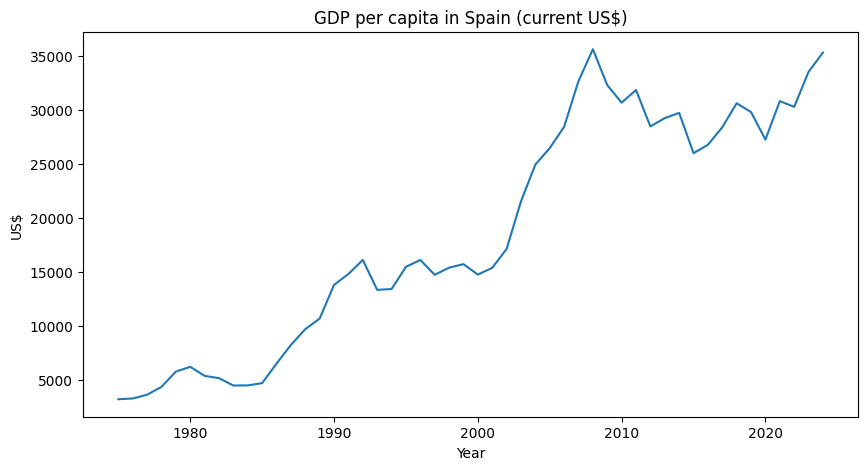

In [21]:
spain_gdp = spain[spain['Series Code'] == 'NY.GDP.PCAP.CD'].copy()

spain_gdp.loc[:, "Year"] = pd.to_numeric(spain_gdp["Year"], errors="coerce")
spain_gdp.loc[:, "Value"] = pd.to_numeric(spain_gdp["Value"], errors="coerce")

plt.figure(figsize=(10,5))
sns.lineplot(data=spain_gdp, x="Year", y="Value")
plt.title("GDP per capita in Spain (current US$)")
plt.ylabel("US$")
plt.show()

This chart shows the GDP per capita in Spain over time.

1. **Steady growth until the mid-2000s**
    * From the 1970s to around 2007, GDP per captia rose strongly.
    * This reflects Spain's economic convergence with the EU and the pre-financial crisis expansion.
2. **Sharp decline after the global financial crisis (2008-2013)**
    * GDP per captia dropped significantly after 2008, bottoming out around 2013.
    * This correspond to the housing market collapse, high unemployment, and a prolonged recession in Spain.
3. **Recovery with some fluctuations**
    * From 2014 onward, GDP per captita shows stady recovery.
    * Some ups and dows are visible, likely linked to European crises, exchange rate effects, and later the COVID-19 shock in 2020.
4. **Recent levels near historical highs (2023-2024)**
    * GDP per capita has climbed again, approaching the pre-2008 peak, indicating a solid rebound. 


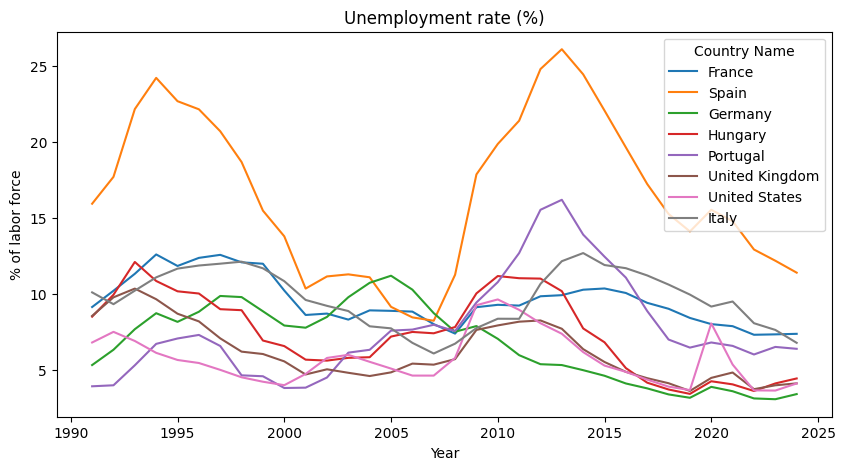

In [23]:
subset = df[(df["Series Code"]=="SL.UEM.TOTL.ZS")]

subset.loc[:, "Year"] = pd.to_numeric(subset["Year"], errors="coerce")
subset.loc[:, "Value"] = pd.to_numeric(subset["Value"], errors="coerce")


plt.figure(figsize=(10,5))
sns.lineplot(data=subset, x="Year", y="Value", hue="Country Name")
plt.title("Unemployment rate (%)")
plt.ylabel("% of labor force")
plt.show()

1. Spain as the outlier
    * Spain consistently has the highest unemployment rates amount the group.
    * Peaked at over 25% in 2013 following the Eurozone crisis.
    * Despite declines after 2014, unemployment remains structurally higher than peers.
2. Eurozone crisis impact from 2008 to 2014.
    * Most European countries saw sharp increases in unemployment.
    * Reflects the combined effects of the global financial crisis and the sovereign debt crisis.
3.  Germany's resilience
    * Germany diverged from the group, after 2005, unemployment steadily declined.
    * By the 2010s, Germany maintained one of the lowest unemployment rates, highlighting a stronger labor market.
4.	United States’ cyclical pattern
	* The U.S. shows short-term spikes during recessions (early 1990s, 2008–09, 2020 pandemic).
	* Unlike Southern Europe, unemployment falls quickly after crises.
5.	France, Italy, and Portugal
	* These countries maintain moderately high unemployment rates (7–12%).
	* They did not reach Spain’s peaks but also show slower recoveries compared to Germany or the U.S.

**Relationship between GDP per capita and Unemployment in Spain**

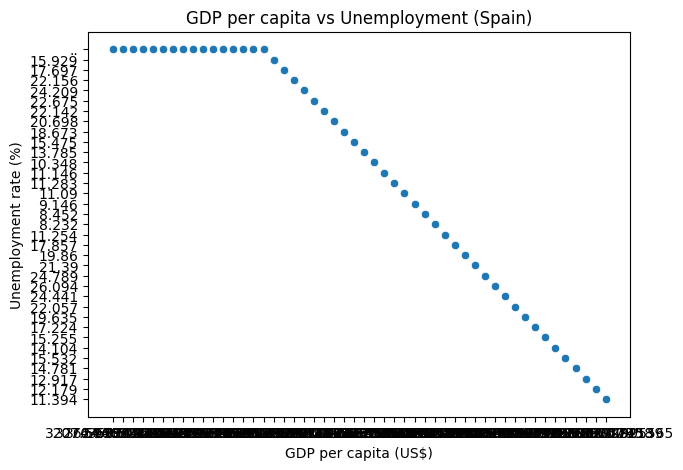

In [26]:
spain_gdp = spain[spain["Series Code"]=="NY.GDP.PCAP.CD"]
spain_unemp = spain[spain["Series Code"]=="SL.UEM.TOTL.ZS"]

merged = spain_gdp.merge(spain_unemp, on="Year", suffixes=("_gdp","_unemp"))

plt.figure(figsize=(7,5))
sns.scatterplot(data=merged, x="Value_gdp", y="Value_unemp")
plt.title("GDP per capita vs Unemployment (Spain)")
plt.xlabel("GDP per capita (US$)")
plt.ylabel("Unemployment rate (%)")
plt.show()